### **Appendix**

In [ ]:
#evaluation
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline, FeatureUnion
#preprocess source
import plotly.graph_objects as go
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("stopwords")
from textblob import TextBlob
from nltk.corpus import wordnet as wn
!pip install emoji

import emoji
from sklearn.feature_extraction.text import TfidfVectorizer
#lemmatization
from nltk.stem import WordNetLemmatizer
wnl = nltk.WordNetLemmatizer() 

#feature selection
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.feature_selection import VarianceThreshold
import sklearn.feature_selection
import matplotlib.pyplot as plt

#mdel training
import sklearn.model_selection as model_selection

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#abbreviation map
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"ned":"need",
"neds":"needs",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wa":"was",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def plot_distributions(x,y,name):
    fig = go.Figure([
        go.Bar(x=x, y=y)
    ])

    fig.update_layout(title_text=name)
    fig.show()

In [ ]:
def expand_contractions(sentence, contraction_mapping):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                      
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    expanded_sentence = contractions_pattern.sub(expand_match, sentence)
    return expanded_sentence
#The main function expand_contractions uses the expand_match function 
#to find each written word that matches a regular expression pattern made up of words written 
#in the CONTRACTION_MAP library. After matching the write, 
#replace it with the corresponding extended version and keep the word in the written form

In [ ]:
class RepeatReplacer():
    def __init__(self):
        self.repeat_reg = re.compile(r'(\w*)(\w)\2(\w*)')
        self.repl = r'\1\2\3'
    def replace(self, word):
        if wn.synsets(word):  #whether the string is word
            return word
        repl_word = self.repeat_reg.sub(self.repl, word)
        if repl_word != word:
            return self.replace(repl_word)
        else:
            return repl_word

In [ ]:
data = pd.read_csv("Mental-Health-Twitter.csv", index_col=0)
df = data.copy()
text=df['post_text']
text.head()

0    It's just over 2 years since I was diagnosed w...
1    It's Sunday, I need a break, so I'm planning t...
2    Awake but tired. I need to sleep but my brain ...
3    RT @SewHQ: #Retro bears make perfect gifts and...
4    It’s hard to say whether packing lists are mak...
Name: post_text, dtype: object

In [ ]:
plot_distributions(x= df['label'].value_counts().index, y= df['label'].value_counts().values, name= 'Class Distribution train')
#data balanced

In [ ]:
#the most frequent 10 words in text
freq = pd.Series(' '.join(text).split()).value_counts()[:10]
freq=list(freq.index)
freq_top=[]
for i in freq:
  i=i.lower()
  freq_top.append(i)
freq_top.append(';-;')
freq_top

['the', 'i', 'to', 'rt', 'a', 'you', 'and', 'is', 'of', 'for', ';-;']

In [ ]:
# regular expression
r4 =  "\\【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+""'?@|:~{}#]+|[——！\\\，。=？、：“”‘’￥……（）《》【】]"
#1.<U+1F300> - <U+1F5FF> symbols and pictographs 
#<U+1F600> - <U+1F64F> emoji  
#<U+1F680> - <U+1F6FF>Traffic symbols and map symbols 
#<U+2600> - <U+2B55>Other symbols  
#<U00010000> - <U0010ffff>English emoji
#p = re.compile(u'['u'\U0001F300-\U0001F64F' u'\U0001F680-\U0001F6FF' u'\u2600-\u2B55 \U00010000-\U0010ffff]+')
stop = stopwords.words('english')
# content in <>
cleanr = re.compile('<.*?>')
# https
link = re.compile(r'[http|https]*://[a-zA-Z0-9.?/&=:]*', re.S)
#corrext spelling (time comsumption just for top 10)
text[:10].apply(lambda x: str(TextBlob(x).correct()))
#correct repeat
replacer_Repeat = RepeatReplacer()

#correct abbreviation
text_full = [expand_contractions(sentence, CONTRACTION_MAP)for sentence in text]


#create word list from text
text_list=[]
for sentence in text_full:
  sentence = replacer_Repeat.replace(sentence)
  description = re.sub(link,'',sentence)         #remove link
  description= re.sub(cleanr,' ',description)         #remove html
  description = re.sub(r4,'',description)         #remove strange signal
  description=emoji.replace_emoji(description)        #remove emoji
  description = description.lower()            #lowercase
  description = description.replace('[^\w\s]','')     #remove Punctuations
  #description = nltk.word_tokenize(description)      #extract token
  filter_sentence= [w for w in description.split() if w not in stop] #remove stop words
  description=[x for x in description.split() if not x.startswith("#")] #remove mentions
  description=[x for x in description if x not in freq_top]  #remove the most frequent 10 words #freq_top
  description = [wnl.lemmatize(word) for word in description]   #Lemmatizer
  description = " ".join(description)
  # it makes sentences from our clean words
  text_list.append(description)

text_list

['it just over 2 year since wa diagnosed with depresion today am taking moment reflect on how far have come since',
 'it sunday ned break so am planing spend a litle time a posible on a14',
 'awaske but tired ned slep but my brain ha other idea',
 'sewhq yay',
 'it hard say whether packing list are making life easier or just reinforcing how much stil neds doing anxiety',
 'making packing list my new hoby movinghouse',
 'at what point doe keping stuf nostalgic reason cro line into plain old hoarding movinghouse',
 'curently in finding-boxes-of-random-shit packing phase think im closet hoarder',
 'canot be bothered cok take awasy on wasy lazy',
 'itventsnews itv release promo video final series downton abey',
 'also have much stuf wasy wasy much movinghouse',
 'never wasnt put one these together again lotharderthanitloks',
 'moving stuf blomin knackering there stil load do',
 'back at house moving stuf it so peaceful here',
 'urgh anxiety f where doe it come from breathe',
 'have much st

In [ ]:
dataset={"text":text_list,"label":df['label']}
data_processed=pd.DataFrame(dataset)
data_processed.head()

dtf_train, dtf_test = model_selection.train_test_split(data_processed, test_size=0.3)## get target
y_train = dtf_train["label"].values
y_test = dtf_test["label"].values



In [ ]:
tfidf = TfidfVectorizer(max_features=3000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(dtf_train['text'])
train_vect

<14000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 66214 stored elements in Compressed Sparse Row format>

In [ ]:
tf_idf = pd.DataFrame(train_vect.toarray(), columns=tfidf.get_feature_names()) # to DataFrame
tf_idf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,10,1010,10th,11,12,13,14,15,16,17,...,zayin,zayn,zaynmalik,zenhabits,zero,zink,zone,zquad,zsa,zurab
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#remove constant (none)
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(tf_idf)
tf_idf.columns[var_thres.get_support()]
constant_columns = [column for column in tf_idf.columns
if column not in tf_idf.columns[var_thres.get_support()]]
tf_idf.drop(constant_columns,axis=1)
tf_idf.head()

,10,1010,10th,11,12,13,14,15,16,17,...,zayin,zayn,zaynmalik,zenhabits,zero,zink,zone,zquad,zsa,zurab
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Feature Selection
X_names = tfidf.get_feature_names_out()
y = dtf_train["label"]
print(len(X_names))
p_value_limit = 0.95
dtf_features = pd.DataFrame()
for cat in np.unique(y_train):
    chi2, p = sklearn.feature_selection.chi2(tf_idf, y==cat)
    dtf_features = dtf_features.append(pd.DataFrame(
                   {"feature":X_names, "score":1-p, "y":cat}))
    dtf_features = dtf_features.sort_values(["y","score"], 
                    ascending=[True,False])
    dtf_features = dtf_features[dtf_features["score"]>p_value_limit]
X_names_new = dtf_features["feature"].unique().tolist()
print("after chisquare: feature left 623 from 3000")
print(len(X_names_new))

3000
after chisquare: feature left 623 from 3000
623


In [ ]:
vectorizer_new = TfidfVectorizer(vocabulary=X_names_new)
vectorizer_new.fit(dtf_train['text'])
x_train = vectorizer_new.transform(dtf_train['text'])
dic_vocabulary = vectorizer_new.vocabulary_
x_train 


<14000x623 sparse matrix of type '<class 'numpy.float64'>'
	with 19705 stored elements in Compressed Sparse Row format>

In [ ]:
## pipeline
#Putting the Tf-Idf vectorizer and the Naive Bayes classifier 
#in a pipeline allows us to transform and predict test data in just one step.

#test
x_test=vectorizer_new.transform(dtf_test['text'])

x_test


<6000x623 sparse matrix of type '<class 'numpy.float64'>'
	with 7973 stored elements in Compressed Sparse Row format>

Logistic Regression's accuracy:
0.7723333333333333
confusion matrix [[2739  248]
 [1118 1895]]
              precision    recall  f1-score   support

           0       0.71      0.92      0.80      2987
           1       0.88      0.63      0.74      3013

    accuracy                           0.77      6000
   macro avg       0.80      0.77      0.77      6000
weighted avg       0.80      0.77      0.77      6000

logistic regression's AUC: 0.77295740331124


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

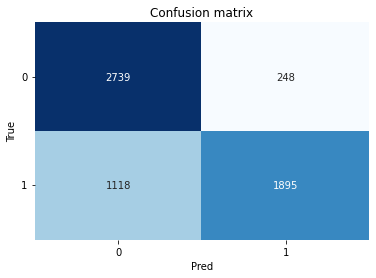

In [ ]:
# import model
#logistic regression

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)
predict_results_LR = LR.predict(x_test)
print("Logistic Regression's accuracy:")
print(accuracy_score(predict_results_LR, y_test))
conf_mat = confusion_matrix(y_test, predict_results_LR)
print("confusion matrix",conf_mat)
print(classification_report(y_test, predict_results_LR))
print("logistic regression's AUC:",roc_auc_score(y_test, predict_results_LR))
#AUC > 0.7 is acceptable

classes = np.unique(y_test)
y_test_array = pd.get_dummies(y_test, drop_first=False).values
    
## Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(conf_mat, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


naive_bayes's accuracy:
0.7426666666666667
[[1517 1470]
 [  74 2939]]
              precision    recall  f1-score   support

           0       0.95      0.51      0.66      2987
           1       0.67      0.98      0.79      3013

    accuracy                           0.74      6000
   macro avg       0.81      0.74      0.73      6000
weighted avg       0.81      0.74      0.73      6000

naive_bayes's AUC: 0.7416535932730293


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

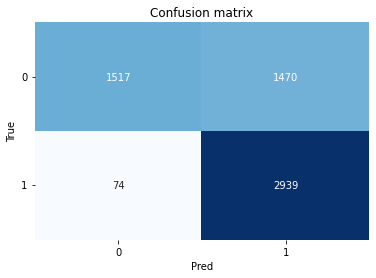

In [ ]:
#Bayes
from sklearn.naive_bayes import GaussianNB
ga=GaussianNB()
ga.fit(x_train.toarray(),y_train)
predict_results_NB=ga.predict(x_test.toarray())
print("naive_bayes's accuracy:")
#accuracy
print(ga.score(x_test.toarray(),y_test))
conf_mat_bayes=confusion_matrix(y_test,predict_results_NB)
print(conf_mat_bayes)
print(classification_report(y_test, predict_results_NB))
print("naive_bayes's AUC:",roc_auc_score(y_test, predict_results_NB))

fig, ax = plt.subplots()
sns.heatmap(conf_mat_bayes, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

SVM's accuracy:
0.7761666666666667
[[2710  277]
 [1066 1947]]
              precision    recall  f1-score   support

           0       0.72      0.91      0.80      2987
           1       0.88      0.65      0.74      3013

    accuracy                           0.78      6000
   macro avg       0.80      0.78      0.77      6000
weighted avg       0.80      0.78      0.77      6000

SVM's AUC: 0.7767323075288858


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

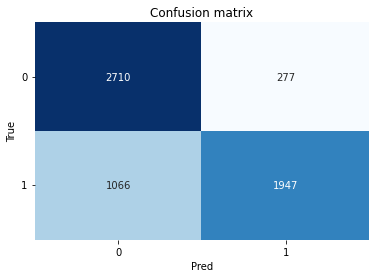

In [ ]:
#SVM
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C=2)#create SVM model #bigger c,more strict model
clf.fit(x_train,y_train)#train
clf_y_predict=clf.predict(x_test)#predicting
scores_SVM = clf.score(x_test,y_test)#scoring
print("SVM's accuracy:")
print(scores_SVM)
conf_mat_SVM=confusion_matrix(y_test,clf_y_predict)
print(conf_mat_SVM)
print(classification_report(y_test, clf_y_predict))
print("SVM's AUC:",roc_auc_score(y_test, clf_y_predict))

fig, ax = plt.subplots()
sns.heatmap(conf_mat_SVM, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

Decision Tree's accuracy:
0.5535
[[2710  277]
 [1066 1947]]
              precision    recall  f1-score   support

           0       0.53      1.00      0.69      2987
           1       0.99      0.11      0.20      3013

    accuracy                           0.55      6000
   macro avg       0.76      0.56      0.45      6000
weighted avg       0.76      0.55      0.44      6000

Decision Tree's AUC: 0.5554235962875302


(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

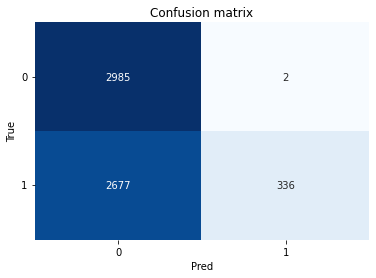

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree

tree_clf = tree.DecisionTreeClassifier(max_depth=4)
tree_clf = tree_clf.fit(x_train,y_train)
tree_y_predict=tree_clf.predict(x_test)
score_decisionTree = tree_clf.score(x_test,y_test)
print("Decision Tree's accuracy:")
print(score_decisionTree)
conf_mat_DT=confusion_matrix(y_test,tree_y_predict)
print(conf_mat_SVM)
print(classification_report(y_test, tree_y_predict))
print("Decision Tree's AUC:",roc_auc_score(y_test, tree_y_predict))

fig, ax = plt.subplots()
sns.heatmap(conf_mat_DT, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)

